# MNIST Classification and Neural Network Modelling

## Libraries and Imports

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import idx2numpy
import time

from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix

## Data Preprocessing

### MNIST Dataset Loading

In [60]:
X_train = './dataset/train-images.idx3-ubyte'
Y_train = './dataset/train-labels.idx1-ubyte'

### Converting IDX binary files to NumPy arrays

In [61]:
X_train = idx2numpy.convert_from_file(X_train)
Y_train = idx2numpy.convert_from_file(Y_train)

### Flattening Images

In [62]:
X_train = X_train.reshape(-1, 28 * 28)

### Data Normalisation

In [63]:
X_train = X_train / 255.0

## Data Preparation

### Dataset Splitting
#### 60% training, 20% validation, and 20% testing

In [64]:
X_train = torch.tensor(X_train, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.long)
X_temp, X_test, Y_temp, Y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_temp, Y_temp, test_size=0.25, random_state=42)

### Batching the Data

In [65]:
training_dataset = TensorDataset(X_train, Y_train)
validation_dataset = TensorDataset(X_val, Y_val)
test_dataset = TensorDataset(X_test, Y_test)

def data_loader(batch_size):
    train_loader = DataLoader(training_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(validation_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

train_loader, val_loader, test_loader = data_loader(64)

## Softmax Regression

### Model Implementation

In [66]:
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.linear(x)

### Optimizer and Loss Function Definition

In [67]:
def softmax(learning_rate):
    model = SoftmaxRegression(input_size=28*28, num_classes=10)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    return model, optimizer, criterion

model, optimizer, criterion = softmax(0.01)

### Training and Logging

In [68]:
def trainer(model, train_loader, val_loader, epochs):
    training_losses = []
    validation_losses = []
    training_times = []
    validation_times = []

    for epoch in range(epochs):
        model.train()
        epoch_training_loss = 0
        start_training_time = time.time()
        
        for images, labels in train_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            epoch_training_loss += loss.item()
        
        training_time = time.time() - start_training_time
        training_times.append(training_time)
        training_losses.append(epoch_training_loss / len(train_loader))
        
        # Validation Phase
        model.eval()
        epoch_validation_loss = 0
        start_validation_time = time.time()
        
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)
                
                epoch_validation_loss += loss.item()
        
        validation_time = time.time() - start_validation_time
        validation_times.append(validation_time)
        validation_losses.append(epoch_validation_loss / len(val_loader))

    return training_losses, validation_losses, training_times, validation_times

training_losses, validation_losses, training_times, validation_times = trainer(model, train_loader, val_loader, 10)

### Testing

In [69]:
def tester(model, test_loader):
    model.eval()

    true_labels = []
    predicted_labels = []

    # Disable gradient calculation for evaluation
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            
            true_labels.extend(labels.numpy())
            predicted_labels.extend(preds.numpy())

    return true_labels, predicted_labels

true_labels, predicted_labels = tester(model, test_loader)

### Visualisation and Plotting

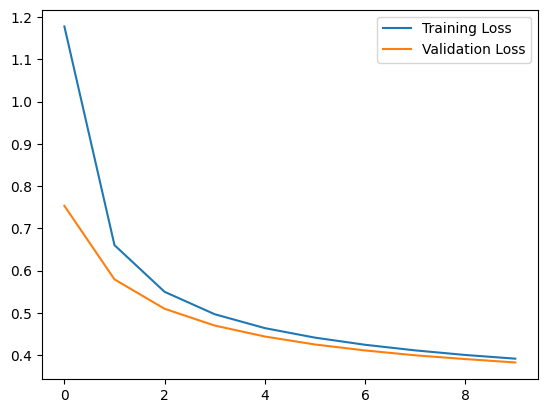

In [70]:
def plotter(training_losses, validation_losses):
    plt.plot(training_losses, label='Training Loss')
    plt.plot(validation_losses, label='Validation Loss')
    plt.legend()
    plt.show()

plotter(training_losses, validation_losses)

### Performance Analysis

#### Generating a Confusion Matrix

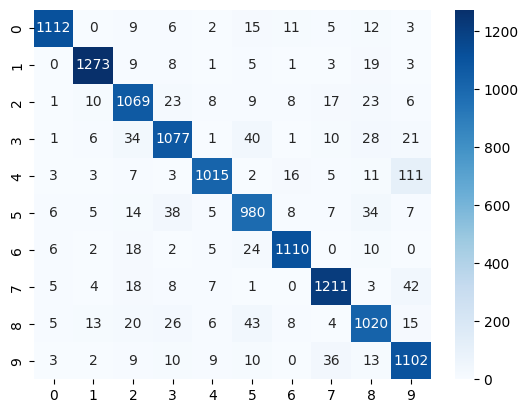

In [73]:
def confusion_matrix_generator(true_labels, predicted_labels):
    confusion = confusion_matrix(true_labels, predicted_labels)
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
    plt.show()

confusion_matrix_generator(true_labels, predicted_labels)

### Parameter Analysis

#### Changing Learning Rates

-------------------- Learning Rate: 0.001 --------------------


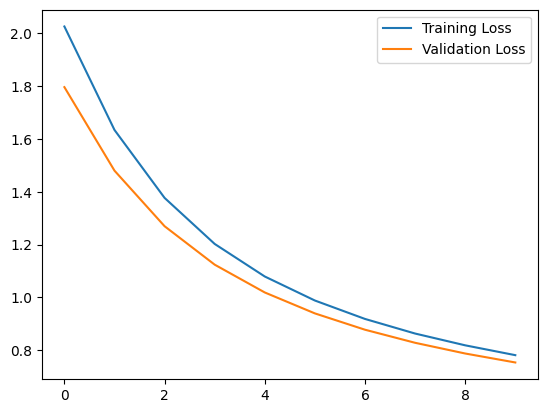

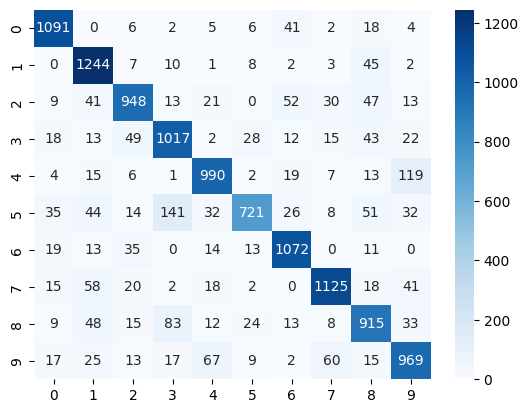

-------------------- Learning Rate: 0.01 --------------------


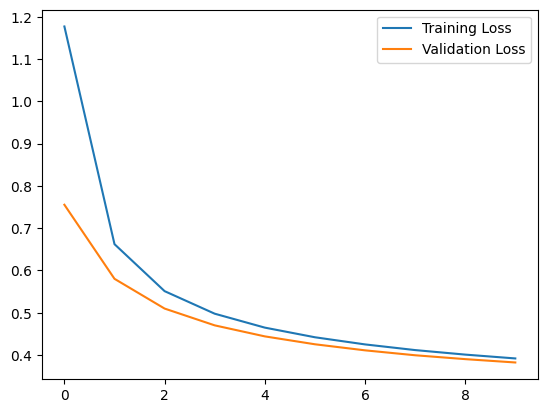

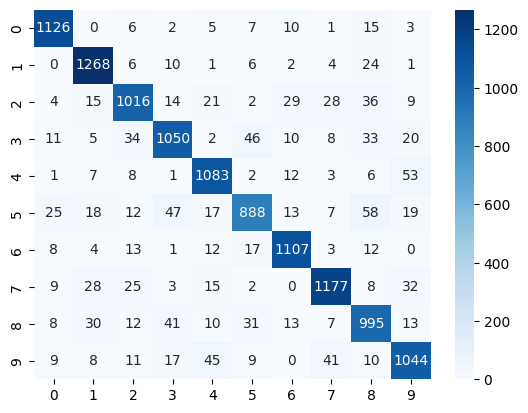

-------------------- Learning Rate: 0.1 --------------------


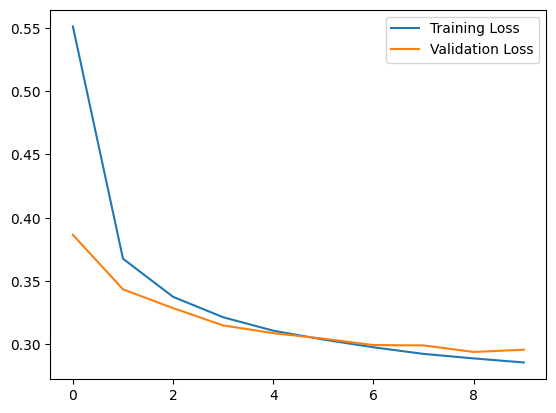

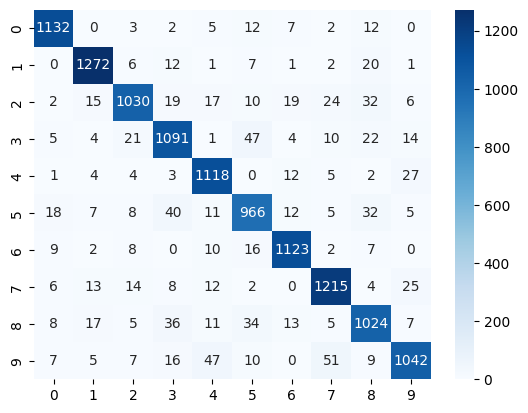

-------------------- Learning Rate: 1.0 --------------------


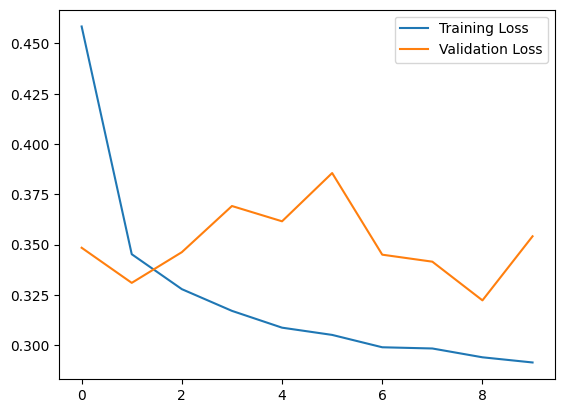

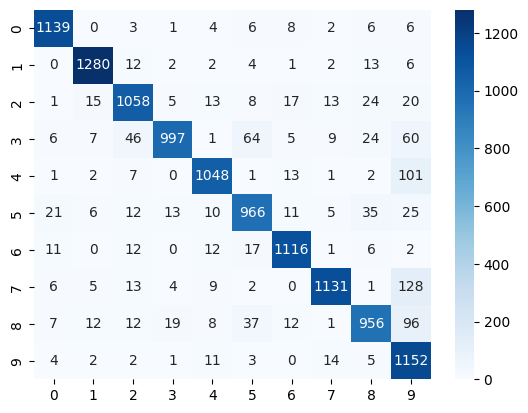

In [74]:
learning_rates = [0.001, 0.01, 0.1, 1.0]
for lr in learning_rates:
    train_loader, val_loader, test_loader = data_loader(64)
    model, optimizer, criterion = softmax(lr)
    training_losses, validation_losses, training_times, validation_times = trainer(model, train_loader, val_loader, 10)
    true_labels, predicted_labels = tester(model, test_loader)
    print(f"-------------------- Learning Rate: {lr} --------------------")
    plotter(training_losses, validation_losses)
    confusion_matrix_generator(true_labels, predicted_labels)

#### Changing Batch Sizes

-------------------- Batch Size: 32 --------------------


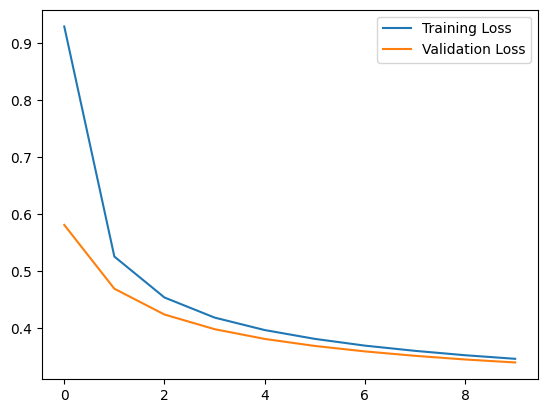

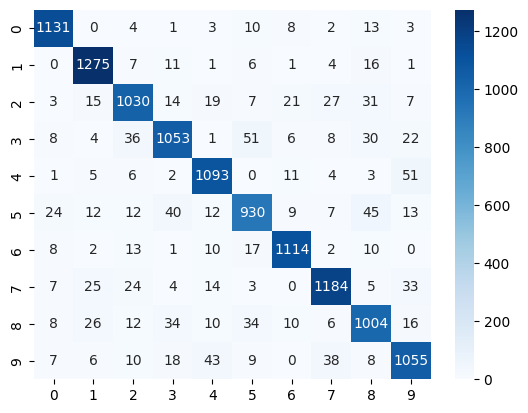

-------------------- Batch Size: 64 --------------------


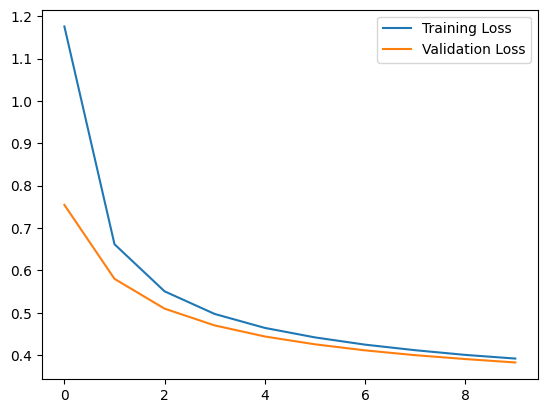

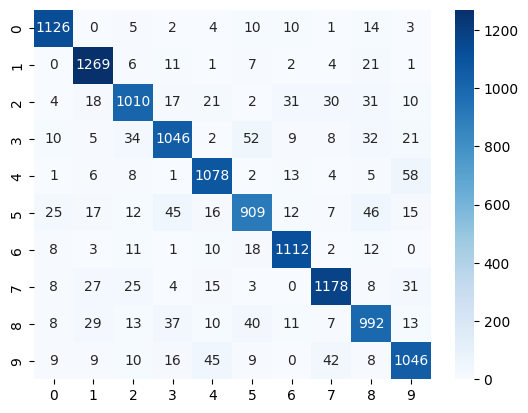

-------------------- Batch Size: 128 --------------------


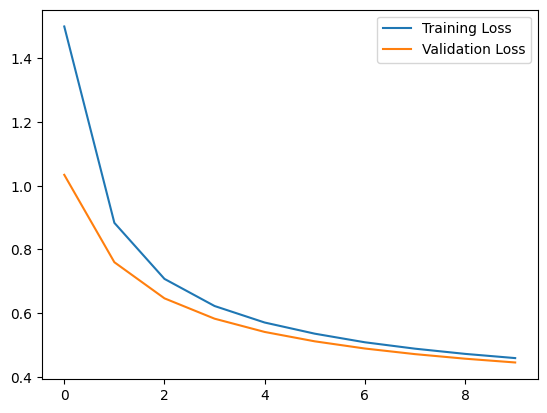

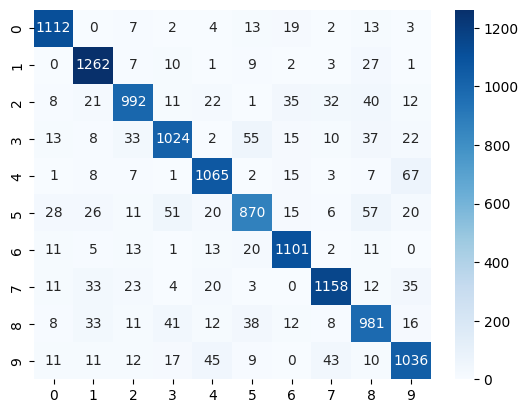

-------------------- Batch Size: 256 --------------------


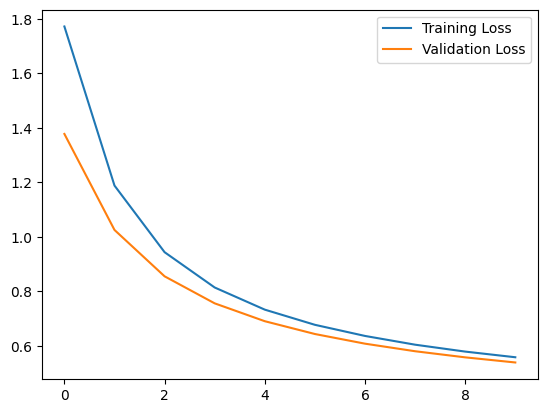

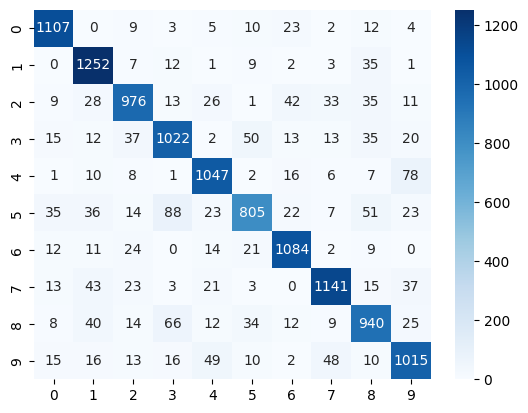

In [75]:
batch_sizes = [32, 64, 128, 256]
for b in batch_sizes:
    train_loader, val_loader, test_loader = data_loader(b)
    model, optimizer, criterion = softmax(0.01)
    training_losses, validation_losses, training_times, validation_times = trainer(model, train_loader, val_loader, 10)
    true_labels, predicted_labels = tester(model, test_loader)
    print(f"-------------------- Batch Size: {b} --------------------")
    plotter(training_losses, validation_losses)
    confusion_matrix_generator(true_labels, predicted_labels)

#### Adding L2 Regularisation

## Neural Network Modelling

### Model Implementation

### Training and Logging

### Visualisation and Plotting

## Analysis and Comparison

### Metrics for Comparison
1. **Final Test Accuracy**: The percentage of correctly classified images from the test dataset.
2. **Training Time**: The total time taken to train each model across all epochs.